In [1]:
%matplotlib inline
import cv2

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [2]:
name_images = [('img1','./imagens_coloridas/baboon.png'),
               ('img2','./imagens_coloridas/watch.png'),
               ('img3','./imagens_coloridas/monalisa.png'),
               ('img4','./imagens_coloridas/peppers.png')]

# para alterar a imagem basta mudar o indide para algum em name_images
indice = 0
image = name_images[indice]
#
num_colors = 3

In [3]:
img = cv2.cvtColor(cv2.imread(image[1]),cv2.COLOR_BGR2RGB)
img = np.array(img, dtype=np.float64) / 255

w, h, d = img.shape
img_array = np.reshape(img, (w * h, d))

sample = int(img_array.shape[0]*0.3)

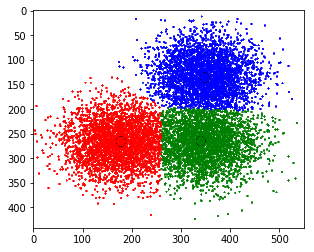

In [4]:
plt.axis('off')
plt.title("Imagem Original")
plt.imshow(img)

In [5]:
img_sample = shuffle(img_array, random_state=0)[:sample]

kmeans = KMeans(n_clusters=num_colors, random_state=0).fit(img_sample)

labels = kmeans.predict(img_array)

In [6]:
def recreate_image(codebook, labels, w, h):
    dim = codebook.shape[1]
    new_image = np.zeros((w, h, dim))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            new_image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return new_image

In [7]:
new_img = recreate_image(kmeans.cluster_centers_, labels, w, h)

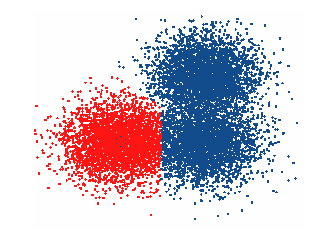

In [8]:
plt.axis('off')
plt.imshow(new_img)
plt.imsave('./output/'+image[0]+"_"+str(num_colors)+'.png',new_img)